In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Definisco le funzioni

In [2]:
def numerov(k2, h, ya, yb, direction='forward', jump_a = False):
    """
    Algoritmo di numerov
    """
    
    M=len(k2)
    if jump_a:
        M=M+1
    
    y=np.zeros(M)
    
    # FORWARD NUMEROV ALGORYTM
    if direction=='forward':
        #initial conditions
        y[0]=ya
        y[1]=yb
        #algorytm
        for i in range(1,M-1):
            if y[i]< abs(np.inf):
                y[i+1] = (y[i] * (2- 5*h**2/6 * k2[i]) - y[i-1] * (1 + h**2/12 * k2[i-1]) ) / (1 + h**2/12 * k2[i+1])
            else:
                y[i+1]=y[i]
                
    # BACKWORD NUMEROV ALGORYTM
    if direction=='backward':
        y=np.zeros(M)
        #initial conditions
        y[M-1]=ya
        y[M-2]=yb
        #algorytm
        for i in range(M-2,0,-1):
            if y[i]< abs(np.inf):
                y[i-1] = (y[i] * (2- 5*h**2/6 * k2[i]) - y[i+1] * (1 + h**2/12 * k2[i+1]) ) / (1 + h**2/12 * k2[i-1])
            else:
                y[i-1]=y[i]
    return y

In [14]:
len([[2,3],[2,4],[2,4]])

3

In [44]:
def root_finder(f, begin, end_or_n_roots, step, tol, method='n_roots' ):
    """
    find roots of a function

    'n_roots' or 'end'
    """

    if method == 'end':
        # coarse find of roots
        E=np.arange(begin,end_or_n_roots,step)
        yM=f(E)
        
        root_bound=[]
        for i in range(1,len(E)):
            if np.sign(yM[i]) != np.sign(yM[i-1]):
                root_bound.append([i-1,i])

    
        # finer find of roots
        roots=[]
        for k in root_bound:
            E_p=E[k[1]]
            E_m=E[k[0]]
            n_iter=0
            #while (abs((E_p-E_m)/(E_p+E_m)*2)>tol)&(n_iter<100):
            while (abs((E_p-E_m)/2)>tol)&(n_iter<100):
                E_temp=(E_p+E_m)/2
                if np.sign(f(E_m)) != np.sign(f(E_temp)):
                    E_p = E_temp
                if np.sign(f(E_temp)) != np.sign(f(E_p)):
                    E_m = E_temp
                n_iter=n_iter+1
            roots.append([(E_p+E_m)/2, E_p-E_m])

    if method =='n_roots':
        # coarse find of roots

        E1=begin
        E2=begin+step
        y1=f(E1)

        root_bound=[]
        while len(root_bound)<end_or_n_roots:
            y2=f(E2)
            if np.sign(y2) != np.sign(y1):
                root_bound.append([E1,E2])
            y1=y2
            E1=E1+step
            E2=E2+step

    
        # finer find of roots
        roots=[]
        for k in root_bound:
            E_p=k[0]
            E_m=k[1]
            n_iter=0
            while (abs((E_p-E_m)/2)>tol)&(n_iter<100):
                E_temp=(E_p+E_m)/2
                if np.sign(f(E_m)) != np.sign(f(E_temp)):
                    E_p = E_temp
                if np.sign(f(E_temp)) != np.sign(f(E_p)):
                    E_m = E_temp
                n_iter=n_iter+1
            roots.append([(E_p+E_m)/2, E_p-E_m])

    return roots

# Esercizio punto 1

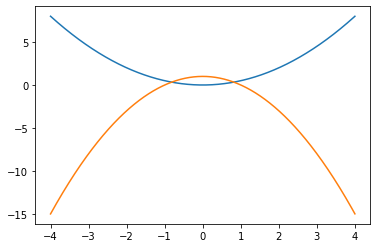

In [41]:
# MASH
h=0.001
x=np.arange(-3.75,3.75,h)
x=np.arange(-4,4,h)
M=len(x)

# POTENTIAL
V = lambda x : x**2/2

k2 = lambda E : 2 * (E - V(x))

plt.plot(x,V(x))
plt.plot(x,k2(0.5))


In [42]:
# dobbiamo creare una funzione dell'energia y_M(E)
yM = np.vectorize(lambda E : (numerov(k2(E),h,0,h)[M-1]))

eigenvalues = root_finder(yM, 0, 5, 0.1, 0.0001,method='n_roots')

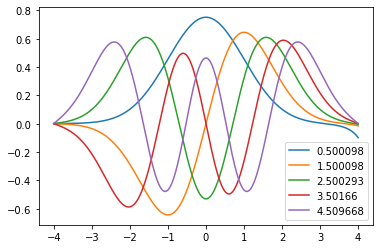

In [43]:
for En in enumerate(np.array(eigenvalues)[:,0]):
    y = (-1)**(En[0]) * numerov(k2(En[1]),h,0,h)
    y = y/np.sqrt(np.sum(y**2*h))
    plt.plot(x,y,label=str(round(En[1],6)))
plt.legend()

# Esercizio 2

In [46]:
# MASH
h=0.001
r=np.arange(0,5,h)
M=len(r)

# POTENTIAL
V = lambda r : r**2/2


def k2_temp(E,l,V,r):
    out=(2 * (E - V(r[1:])) - (l+1)*l/r[1:]**2)
    return np.append([0],out)


k2 = lambda E , l : k2_temp(E, l, V, r)


[[1.5000976562500004, -0.0001953125000000444], [3.5000976562500017, -0.00019531249999982236], [5.500097656249997, -0.00019531249999982236]]


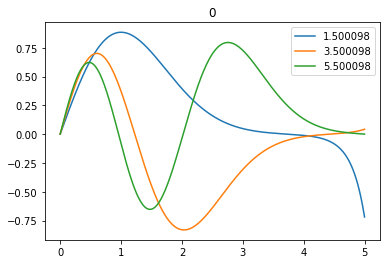

[[2.500097656250001, -0.00019531249999982236], [4.50009765625, -0.00019531249999982236], [6.500488281249993, -0.00019531250000071054]]


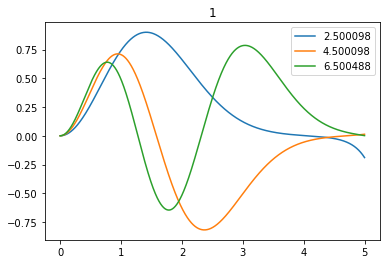

[[3.5000976562500017, -0.00019531249999982236], [5.500097656249997, -0.00019531249999982236], [7.502246093749989, -0.00019531249999982236]]


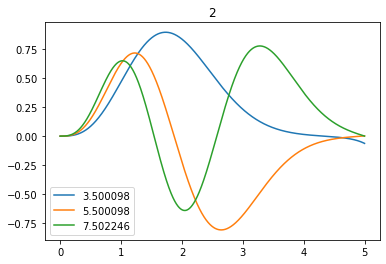

In [62]:
eigen = pd.DataFrame(columns=['l','n','E'])

for l in range(3):
    yM = np.vectorize(lambda E : (numerov(k2(E,l),h,0,h**(l+1))[M-1]))

    eigenvalues = root_finder(yM, 0, 3, 0.1, 0.0001,method='n_roots')
    print(eigenvalues)
    for En in enumerate(np.array(eigenvalues)[:,0]):
        y = numerov(k2(En[1],l),h,0,h)
        y = y/np.sqrt(np.sum(y**2*h))
        plt.plot(r,y,label=str(round(En[1],6)))
    plt.title(l)
    plt.legend()
    plt.show()
    



# point 3

In [108]:
def bessel(N):
    N=N+1
    j=list(range(N))
    j[0]=lambda x : np.sin(x)/x
    for l in range(1,N):
        if l == 1:
            j[l] = lambda x : (2*l+1)/x * j[l-1] - np.cos(x)/x
        else:
            j[l] = lambda x : (2*l+1)/x * j[l-1] - j[l-2]
    return j


In [107]:
j[1](3)

TypeError: unsupported operand type(s) for *: 'float' and 'function'

TypeError: unsupported operand type(s) for *: 'float' and 'function'

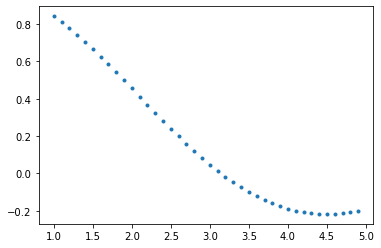

In [106]:
N=4
j=bessel(N)
x=np.arange(1,5,0.1)
for i in range(N):
    plt.plot(x,j[i](x),'.')

